In [1]:
import numpy as np
from keras.datasets import mnist
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

2024-06-26 10:54:11.671583: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-26 10:54:12.689963: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
class KMeansCustom:
    def __init__(self, n_clusters, max_iter=50, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        # centres clusters random
        np.random.seed(42) 
        random_indices = np.random.permutation(len(X))
        self.cluster_centers = X[random_indices[:self.n_clusters]]
        
        for i in range(self.max_iter):
            # Points assignés au centre le plus proche
            self.labels_ = self.assign_clusters(X)
            
            # Calcul nouveaux centres
            new_centers = np.array([X[self.labels_ == j].mean(axis=0) for j in range(self.n_clusters)])
            
            # Verif convergence
            if np.all(np.abs(new_centers - self.cluster_centers) < self.tol):
                break
            
            self.cluster_centers = new_centers

    def assign_clusters(self, X):
        # Distance
        distances = np.linalg.norm(X[:, np.newaxis] - self.cluster_centers, axis=2)
        return np.argmin(distances, axis=1)

    def predict(self, X):
        return self.assign_clusters(X)

In [3]:
def load_mnist_data():
    (X_train, _), (_, _) = mnist.load_data()
    X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
    return X_train

data = load_mnist_data()

: 

In [4]:
def train_kmeans(data, n_clusters):
    kmeans = KMeansCustom(n_clusters=n_clusters)
    kmeans.fit(data)
    return kmeans

kmeans_model = train_kmeans(data, n_clusters=10)

In [ ]:
def compress(data, kmeans):
    compressed_data = kmeans.predict(data)
    return compressed_data
compressed_data = compress(data, kmeans=kmeans_model)

def decompress(compressed_data, kmeans):
    decompressed_data = kmeans.cluster_centers[compressed_data]
    return decompressed_data
decompressed_data = decompress(compressed_data, kmeans=kmeans_model)

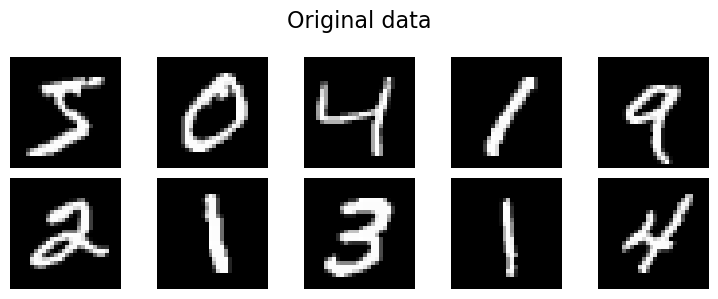

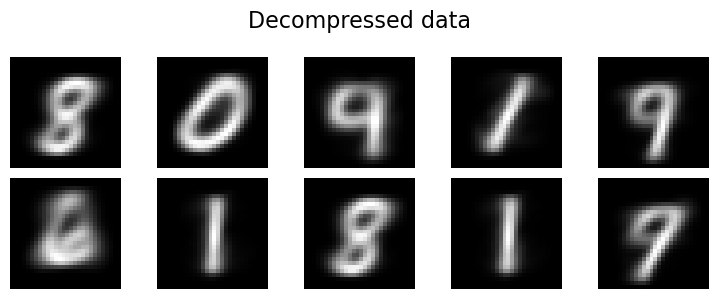

In [ ]:
def plot_images(images, title, n_rows=10, n_cols=10):
    plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
    plt.suptitle(title, fontsize=16)
    for i, image in enumerate(images[:n_rows * n_cols]):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(image.reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_images(data, title='Original data', n_rows=2, n_cols=5)
plot_images(decompressed_data, title='Decompressed data', n_rows=2, n_cols=5)

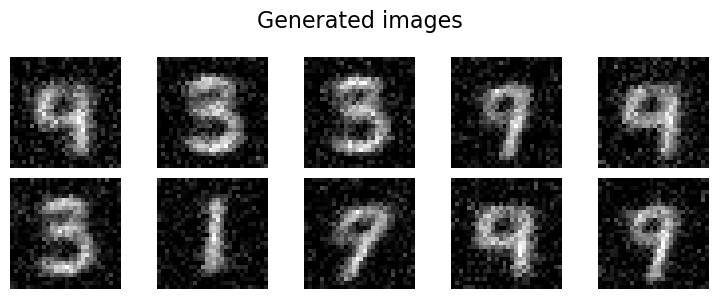

In [ ]:
def generate_new_images(kmeans, n_images=10, noise_level=0.1):
    new_images = []
    for _ in range(n_images):
        cluster_idx = np.random.choice(kmeans.n_clusters)
        cluster_center = kmeans.cluster_centers[cluster_idx]
        new_image = cluster_center + np.random.normal(scale=noise_level, size=cluster_center.shape)
        new_image = np.clip(new_image, 0, 1)
        new_images.append(new_image)
    return np.array(new_images)

generated_images = generate_new_images(kmeans_model, n_images=10, noise_level=0.1)

plot_images(generated_images, title='Generated images', n_rows=2, n_cols=5)